In [1]:
import matplotlib.pyplot as plt
import utils
import stereo_datasets


70


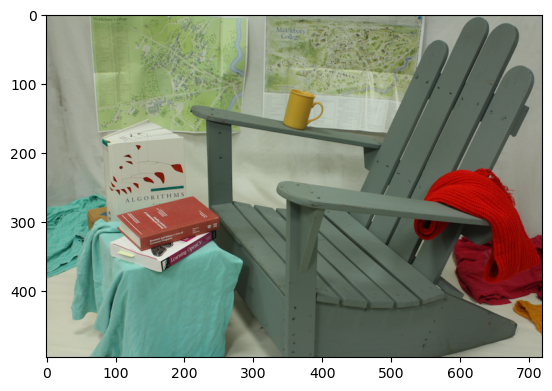

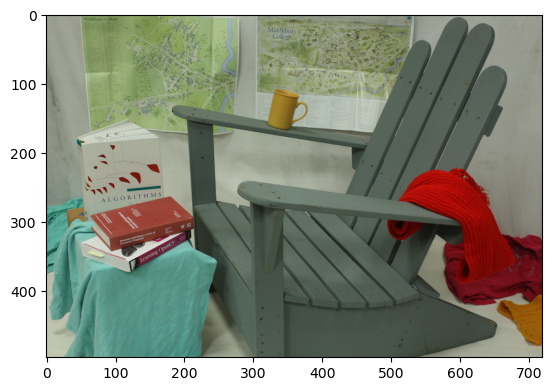

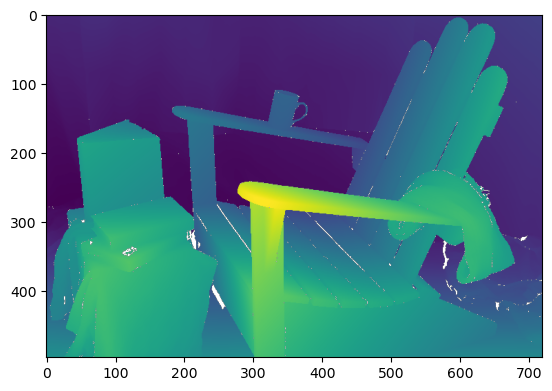

In [2]:
dataset = stereo_datasets.get_dataset('Adirondacks')
plt.figure(); plt.imshow(dataset['left'])
plt.figure(); plt.imshow(dataset['right'])
plt.figure(); plt.imshow(dataset['gt'])
print(dataset['dmax'])

In [ ]:
import numpy as np
#==============No additional imports allowed ================================#

def get_ncc_descriptors(img, patchsize):
    '''
    Prepare normalized patch vectors for normalized cross
    correlation.

    Input:
        img -- height x width x channels image of type float32
        patchsize -- integer width and height of NCC patch region.
    Output:
        normalized -- height* width *(channels * patchsize**2) array

    For every pixel (i,j) in the image, your code should:
    (1) take a patchsize x patchsize window around the pixel,
    (2) compute and subtract the mean for every channel
    (3) flatten it into a single vector
    (4) normalize the vector by dividing by its L2 norm
    (5) store it in the (i,j)th location in the output

    If the window extends past the image boundary, zero out the descriptor
    
    If the norm of the vector is <1e-6 before normalizing, zero out the vector.

    '''
    x, y, c = img.shape
    offset = patchsize // 2

    normalized = np.zeros((x, y, c * patchsize**2), dtype=np.float32)

    for i in range(x):
        if (i - offset < 0) | (i + offset >= x):
            img[i, :, :] = np.zeros_like(img[i, :, :])
            continue
        for j in range(y):
            if (j - offset < 0) | (j + offset >= y):
                img[i, j, :] = np.zeros_like(img[i, j, :])
                continue
            patch = img[i - offset : i + offset, j - offset : j + offset, :]
            mean = np.mean(patch, axis=(0, 1))
            patch -= mean
            patch_flat = patch.flatten()
            norm = np.linalg.norm(patch_flat)
            if norm > 1e-6:
                patch_flat /= norm
            else:
                patch_flat = np.zeros_like(patch_flat)
            normalized[i, j, :] = patch_flat
    return normalized
    


def compute_ncc_vol(img_right, img_left, patchsize, dmax):
    '''
    Compute the NCC-based cost volume
    Input:
        img_right: the right image, H x W x C
        img_left: the left image, H x W x C
        patchsize: the patchsize for NCC, integer
        dmax: maximum disparity
    Output:
        ncc_vol: A dmax x H x W tensor of scores.

    ncc_vol(d,i,j) should give a score for the (i,j)th pixel for disparity d. 
    This score should be obtained by computing the similarity (dot product)
    between the patch centered at (i,j) in the right image and the patch centered
    at (i, j+d) in the left image.

    Your code should call get_ncc_descriptors to compute the descriptors once.
    '''
    left_ncc = get_ncc_descriptors(img_left, patchsize)
    right_ncc = get_ncc_descriptors(img_right, patchsize)
    h, w, _ = img_left.shape
    ncc_vol = np.zeros((dmax, h, w), dtype=np.float32)
    for d in range(dmax):
        for i in range(h):
            for j in range(w):
                if (j + d) >= w:
                    ncc_vol[d, i, j] = 0
                    continue
                left_patch = left_ncc[i, j, :]
                right_patch = right_ncc[i, j + d, :]
                ncc_vol[d, i, j] = np.dot(left_patch, right_patch)
    return ncc_vol


In [8]:
compute_ncc_vol(dataset['right'], dataset['left'], 7, dataset['dmax'])

(0,)


e:\Coding\CS5670\CS5670_Project3\.conda\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\Coding\CS5670\CS5670_Project3\.conda\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


ValueError: could not broadcast input array from shape (0,) into shape (147,)

In [4]:
import stereo
ncc_vol = stereo.compute_ncc_vol(dataset['right'], dataset['left'], 7, dataset['dmax'])


e:\Coding\CS5670\CS5670_Project3\.conda\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\Coding\CS5670\CS5670_Project3\.conda\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


ValueError: could not broadcast input array from shape (0,) into shape (147,)

In [4]:
disparity = stereo.get_disparity(ncc_vol)

In [5]:
disparity = np.clip(disparity, 0, dataset['dmax'])
plt.imshow(disparity)

TypeError: '>=' not supported between instances of 'NoneType' and 'int'

In [ ]:
error_metric = stereo_datasets.evaluate(disparity, dataset['gt'])
print(error_metric)

In [ ]:
dataset = stereo_datasets.get_dataset('Teddy')
plt.figure(); plt.imshow(dataset['left'])
plt.figure(); plt.imshow(dataset['right'])
plt.figure(); plt.imshow(dataset['gt'])
print(dataset['dmax'])

In [ ]:
ncc_vol = stereo.compute_ncc_vol(dataset['right'], dataset['left'], 15, dataset['dmax'])

In [ ]:
disparity = stereo.get_disparity(ncc_vol)

In [ ]:
disparity = np.clip(disparity, 0, dataset['dmax'])
plt.imshow(disparity)

In [ ]:
error_metric = stereo_datasets.evaluate(disparity, dataset['gt'])
print(error_metric)